In [122]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cfgrib
import cartopy.crs as ccrs
import cartopy
from astropy.constants import g0
import math
#import gif
#from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import metpy.calc as mpcalc
import matplotlib.ticker as mticker
from datetime import datetime,timedelta
import pandas as pd
import matplotlib.dates as mdate
from metpy.units import units
%matplotlib inline

plt.rc('font',family='Arial',size=15)

In [105]:
ds = xr.open_dataset("../data/low_level_jets/llj_bt.nc")

In [106]:
ds1.max(),ds1.min()

(<xarray.Dataset>
 Dimensions:  ()
 Data variables:
     elev     int16 914,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     elev     int16 914)

In [107]:
ds2.max(),ds2.min()

(<xarray.Dataset>
 Dimensions:  ()
 Data variables:
     elev     int16 1219,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     elev     int16 1219)

In [108]:
ds.max(),ds.min()

(<xarray.Dataset>
 Dimensions:  ()
 Data variables:
     ws       float64 50.67,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     ws       float64 0.353)

In [109]:
ds1.keys()

KeysView(<xarray.Dataset>
Dimensions:  (lon: 1, lat: 1)
Coordinates:
  * lon      (lon) float64 87.0
  * lat      (lat) float64 38.93
Data variables:
    elev     (lat, lon) int16 914
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Thu Feb 10 17:58:53 2022: cdo remapnn,lon=87/lat=38.93 dixi...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...)

In [110]:
args = {'name':'mean_ws',
        'units': 'm/s'}
ds['mean_ws'] = ds.ws.mean('lat').mean('lon')
ds.mean_ws.attrs = args



# convert the x and y axis
args = {'name':'mean_ws_convert_axis',
        'units': 'm/s'}
ds['llj'] = ds.mean_ws.T
ds.llj.attrs = args

In [111]:
ds['height'] = mpcalc.pressure_to_height_std(ds['level'])

In [112]:
ds.keys()

KeysView(<xarray.Dataset>
Dimensions:  (time: 80, lon: 1, lat: 1, level: 20)
Coordinates:
  * time     (time) datetime64[ns] 2021-03-11T02:00:00 ... 2021-03-20T23:00:00
  * lon      (lon) float64 109.8
  * lat      (lat) float64 40.66
  * level    (level) float64 300.0 350.0 400.0 450.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    ws       (time, level, lat, lon) float32 22.69 18.42 15.72 ... 2.572 2.584
    mean_ws  (time, level) float32 22.69 18.42 15.72 13.62 ... 2.54 2.572 2.584
    llj      (level, time) float32 22.69 21.15 20.88 18.21 ... 7.495 4.041 2.584
    height   (level) float64 <Quantity([9.15902824 8.11290006 7.18156845 6.34...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Feb 03 13:12:19 2022: cdo remapnn,lon=109.83/lat=40.66 ...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...)

In [113]:
args = {'name':'height_m',
        'units': 'm'}
ds['height_m'] = ds.height*1000
ds.height_m.attrs = args

In [114]:
ds.keys()

KeysView(<xarray.Dataset>
Dimensions:   (time: 80, lon: 1, lat: 1, level: 20)
Coordinates:
  * time      (time) datetime64[ns] 2021-03-11T02:00:00 ... 2021-03-20T23:00:00
  * lon       (lon) float64 109.8
  * lat       (lat) float64 40.66
  * level     (level) float64 300.0 350.0 400.0 450.0 ... 950.0 975.0 1e+03
Data variables:
    ws        (time, level, lat, lon) float32 22.69 18.42 15.72 ... 2.572 2.584
    mean_ws   (time, level) float32 22.69 18.42 15.72 13.62 ... 2.54 2.572 2.584
    llj       (level, time) float32 22.69 21.15 20.88 ... 7.495 4.041 2.584
    height    (level) float64 <Quantity([9.15902824 8.11290006 7.18156845 6.3...
    height_m  (level) float64 <Quantity([9159.02824267 8112.90006202 7181.568...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Feb 03 13:12:19 2022: cdo remapnn,lon=109.83/lat=40.66 ...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpim

In [116]:
args = {'name':'AGL',
        'units': 'm'}
ds['AGL'] = ds.height_m - 1219000. * units.meter
ds.AGL.attrs = args

In [117]:
ds.keys()

KeysView(<xarray.Dataset>
Dimensions:   (time: 80, lon: 1, lat: 1, level: 20)
Coordinates:
  * time      (time) datetime64[ns] 2021-03-11T02:00:00 ... 2021-03-20T23:00:00
  * lon       (lon) float64 109.8
  * lat       (lat) float64 40.66
  * level     (level) float64 300.0 350.0 400.0 450.0 ... 950.0 975.0 1e+03
Data variables:
    ws        (time, level, lat, lon) float32 22.69 18.42 15.72 ... 2.572 2.584
    mean_ws   (time, level) float32 22.69 18.42 15.72 13.62 ... 2.54 2.572 2.584
    llj       (level, time) float32 22.69 21.15 20.88 ... 7.495 4.041 2.584
    height    (level) float64 <Quantity([9.15902824 8.11290006 7.18156845 6.3...
    height_m  (level) float64 <Quantity([9159.02824267 8112.90006202 7181.568...
    AGL       (level) float64 <Quantity([ 7.94002824e+03  6.89390006e+03  5.9...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Feb 03 13:12:19 2022: cdo remapnn,lon=109.83/lat=

In [118]:
ds.set_coords('AGL')

Magnitude,[7940.028242671462 6893.900062019325 5962.568453172953 5121.204302290991 4352.434423209202 3643.596384290676 2985.1578027693977 2369.751462706507 1791.5580257836668 1245.895554945448 984.0401123457214 728.937573358983 480.2107001633153 237.51399628499303 0.5301902939261254 -231.03280257570157 -457.4445171927222 -678.9542360953825 -895.7929991954833 -1108.1753680817296]
Units,kilometer
Magnitude,[9.159028242671463 8.112900062019325 7.181568453172953 6.340204302290991 5.571434423209202 4.862596384290676 4.204157802769398 3.588751462706507 3.010558025783667 2.464895554945448 2.2030401123457213 1.947937573358983 1.6992107001633152 1.4565139962849931 1.2195301902939262 0.9879671974242984 0.7615554828072778 0.5400457639046174 0.3232070008045167 0.11082463191827029]
Units,kilometer
Magnitude,[9159.028242671462 8112.900062019325 7181.568453172953 6340.204302290991 5571.434423209202 4862.596384290676 4204.157802769398 3588.751462706507 3010.558025783667 2464.895554945448 2203.0401123457214 1947.937573358983 1699.2107001633153 1456.513996284993 1219.5301902939261 987.9671974242984 761.5554828072778 540.0457639046175 323.2070008045167 110.82463191827028]
Units,kilometer


In [119]:
ds.max(),ds.min()

(<xarray.Dataset>
 Dimensions:   ()
 Data variables:
     ws        float64 50.67
     mean_ws   float64 50.67
     llj       float64 50.67
     height    float64 <Quantity(9.15902824, 'kilometer')>
     height_m  float64 <Quantity(9159.02824, 'kilometer')>
     AGL       float64 <Quantity(7940.02824, 'kilometer')>,
 <xarray.Dataset>
 Dimensions:   ()
 Data variables:
     ws        float64 0.353
     mean_ws   float64 0.353
     llj       float64 0.353
     height    float64 <Quantity(0.110824632, 'kilometer')>
     height_m  float64 <Quantity(110.824632, 'kilometer')>
     AGL       float64 <Quantity(-1108.17537, 'kilometer')>)

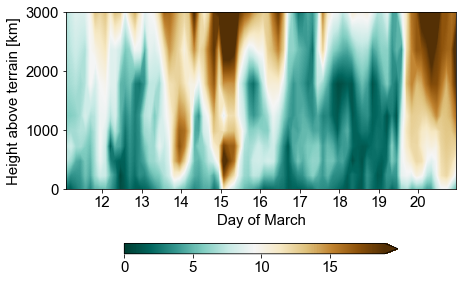

In [120]:
# define a figure
fig = plt.figure(figsize=(7,5))


# add first subplots
ax = fig.add_subplot(1,1,1)

# convert the y label for 100-1000 to 1000-100
#ax.invert_yaxis()


# plot shading for wind speed
llj = np.arange(0, 19, 0.01)
cf = ax.contourf(ds.time, ds.AGL, ds.llj, llj, cmap="BrBG_r", extend='max')
                                                            #cmap=plt.cm.coolwarm:from cool to warm
                                                            #CMRmap_r 
                                                            #plt.cm.YlOrRd
ax.xaxis.set_major_formatter(mdate.DateFormatter('%d'))#设置时间标签显示格式


ax.set_ylabel('Height above terrain [km]')   #set y label
ax.set_xlabel('Day of March')


ax.set_ylim(0,3000)






cb = plt.colorbar(cf, orientation='horizontal', pad=0.2, aspect=25, shrink=0.7)
cb.set_ticks([0, 5, 10, 15, 20])

In [121]:
fig.savefig("../results/dust_emission_ddp_mr/low_level_jets/bt_20210311-20.eps",dpi=300)